## Introduction to Academic Stress Level Analysis

This notebook provides a comprehensive analysis of the "Student Academic Stress Level" dataset. The objective is to understand the factors contributing to academic stress among students and to build a predictive model for academic stress levels.

The process begins with **Data Acquisition and Initial Overview**, where the dataset is loaded and inspected for its structure, data types, and basic statistics. This is followed by a thorough **Data Cleaning Pipeline**, addressing missing values and duplicate entries to ensure data quality.

Next, **Exploratory Data Analysis (EDA) and Visualization** will be conducted to uncover patterns, relationships, and key insights within the cleaned data. Finally, the notebook will proceed to **Data Preparation for Modeling**, building and training a machine learning model, and evaluating its performance to predict academic stress levels based on various student attributes.

Dataset: https://www.kaggle.com/datasets/ayeshaimran1619/student-academic-stress-level

## Data Acquisition & Initial Overview

Load the student academic stress level dataset from the file `academic Stress level` into a pandas DataFrame. Perform an initial inspection to understand its shape, data types, and basic descriptive statistics (e.g., `df.info()`, `df.describe()`). This step is crucial for setting up our data pipeline.


In [3]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv('Student_Academic_Stress_Level.csv')

# Strip whitespace from column names to ensure consistency across the notebook
df.columns = df.columns.str.strip()

# Display the first 5 rows of the DataFrame
print('First 5 rows of the DataFrame:')
print(df.head())
print('\n')

# Print the shape of the DataFrame
print('Shape of the DataFrame:')
print(df.shape)
print('\n')

# Get a concise summary of the DataFrame
print('DataFrame Info:')
df.info()
print('\n')

# Generate descriptive statistics for the numerical columns
print('Descriptive Statistics:')
print(df.describe())

First 5 rows of the DataFrame:
             Timestamp Your Academic Stage  Peer pressure  \
0  24/07/2025 22:05:39       undergraduate              4   
1  24/07/2025 22:05:52       undergraduate              3   
2  24/07/2025 22:06:39       undergraduate              1   
3  24/07/2025 22:06:45       undergraduate              3   
4  24/07/2025 22:08:06       undergraduate              3   

   Academic pressure from your home Study Environment  \
0                                 5             Noisy   
1                                 4          Peaceful   
2                                 1          Peaceful   
3                                 2          Peaceful   
4                                 3          Peaceful   

          What coping strategy you use as a student?  \
0  Analyze the situation and handle it with intel...   
1  Analyze the situation and handle it with intel...   
2                   Social support (friends, family)   
3  Analyze the situation and handle

I will ignore Timestamp, date shouldn't affect the fact that a student is more or less stressed.

## Data Cleaning Pipeline - Missing Values

Identifying and addressing missing values in the dataset. This might involve checking the percentage of missing values per column and deciding on an appropriate strategy (e.g., imputation with mean/median/mode, or dropping rows/columns if the missing data is extensive).


First, I'll calculate and display the number and percentage of missing values for each column in the DataFrame to understand the extent of missing data.



In [4]:
print('Missing values per column:')
missing_values = df.isnull().sum()
print(missing_values)

print('\nPercentage of missing values per column:')
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

Missing values per column:
Timestamp                                                              0
Your Academic Stage                                                    0
Peer pressure                                                          0
Academic pressure from your home                                       0
Study Environment                                                      1
What coping strategy you use as a student?                             0
Do you have any bad habits like smoking, drinking on a daily basis?    0
What would you rate the academic  competition in your student life     0
Rate your academic stress index                                        0
dtype: int64

Percentage of missing values per column:
Timestamp                                                              0.000000
Your Academic Stage                                                    0.000000
Peer pressure                                                          0.000000
Academic pressure fro

Since 'Study Environment' is the only column with missing values (1 missing value, which is less than 1%), and it is a categorical column, I will fill the missing value with its mode.



In [5]:
mode_study_environment = df['Study Environment'].mode()[0]
print(f"Mode of 'Study Environment' column: {mode_study_environment}")

# Fill missing values in 'Study Environment' with its mode
df['Study Environment'] = df['Study Environment'].fillna(mode_study_environment)

# Verify that missing values have been handled
print('\nMissing values after imputation:')
print(df.isnull().sum())

Mode of 'Study Environment' column: Peaceful

Missing values after imputation:
Timestamp                                                              0
Your Academic Stage                                                    0
Peer pressure                                                          0
Academic pressure from your home                                       0
Study Environment                                                      0
What coping strategy you use as a student?                             0
Do you have any bad habits like smoking, drinking on a daily basis?    0
What would you rate the academic  competition in your student life     0
Rate your academic stress index                                        0
dtype: int64


## Data Cleaning Pipeline - Duplicates & Inconsistencies

Detect and handle duplicate rows, if any. Additionally, check for and resolve any data inconsistencies or errors that might have been identified during the initial overview (e.g., incorrect data formats, outliers that need special handling).


### Detect and Handle Duplicate Rows

Now, I will check for duplicate rows in the DataFrame by using the `.duplicated()` method and summing the results to get the total count of duplicates.



In [6]:
print('Number of duplicate rows:')
duplicate_rows = df.duplicated().sum()
print(duplicate_rows)

Number of duplicate rows:
0


Since no duplicate rows were found, I will proceed to identify and list the unique values for the specified categorical columns to check for inconsistencies.



In [7]:
categorical_columns = [
    'Your Academic Stage',
    'Study Environment',
    'What coping strategy you use as a student?',
    'Do you have any bad habits like smoking, drinking on a daily basis?'
]

print('Unique values for categorical columns:')
for col in categorical_columns:
    print(f"\nColumn '{col}':")
    print(df[col].unique())


Unique values for categorical columns:

Column 'Your Academic Stage':
<StringArray>
['undergraduate', 'high school', 'post-graduate']
Length: 3, dtype: str

Column 'Study Environment':
<StringArray>
['Noisy', 'Peaceful', 'disrupted']
Length: 3, dtype: str

Column 'What coping strategy you use as a student?':
<StringArray>
['Analyze the situation and handle it with intellect',
                   'Social support (friends, family)',
                 'Emotional breakdown (crying a lot)']
Length: 3, dtype: str

Column 'Do you have any bad habits like smoking, drinking on a daily basis?':
<StringArray>
['No', 'prefer not to say', 'Yes']
Length: 3, dtype: str


## Exploratory Data Analysis (EDA) & Visualization

Perform in-depth EDA on the cleaned and transformed data, including univariate analysis of distributions and bivariate analysis of relationships with the 'Rate your academic stress index'. Generate insightful visualizations.


I will import the `matplotlib.pyplot` module as `plt` and the `seaborn` module as `sns`, and then set the plot style to `whitegrid` using `sns.set_style()`, to prepare for data visualization.



In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a visually appealing style for the plots
sns.set_style('whitegrid')

Now, I will visualize the distribution of the primary target variable, 'Rate your academic stress index', using a histogram with a kernel density estimate (KDE) for a smoother representation.



C:\Users\Ricar\AppData\Local\Temp\ipykernel_62348\1123611005.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Rate your academic stress index'], kde=True, bins=5, palette='viridis')


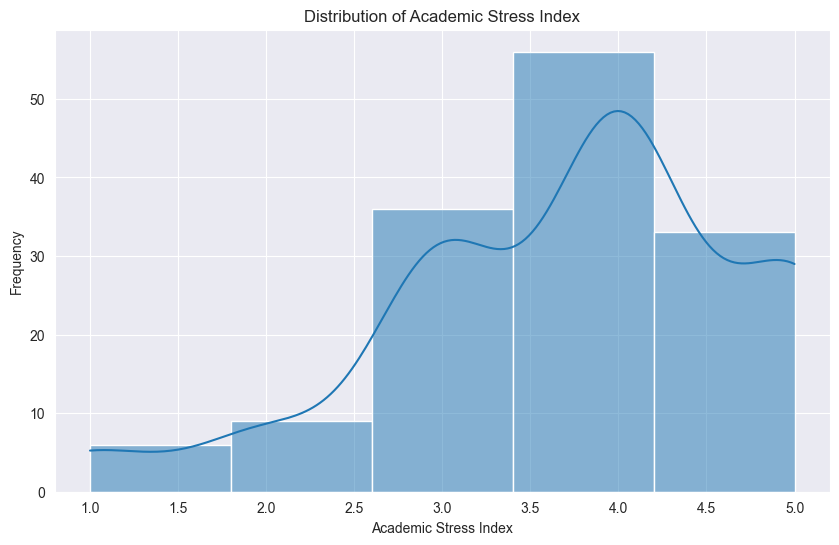

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rate your academic stress index'], kde=True, bins=5, palette='viridis')
plt.title('Distribution of Academic Stress Index')
plt.xlabel('Academic Stress Index')
plt.ylabel('Frequency')
plt.show()


I will create histograms for the numerical/ordinal rating columns: 'Peer pressure', 'Academic pressure from your home', and 'What would you rate the academic competition in your student life', to visualize their distributions. Each plot will include a KDE for smoother representation. Also create a box plots for categorical features vs. 'Rate your academic stress index', and a correlation matrix of relevant numerical columns.



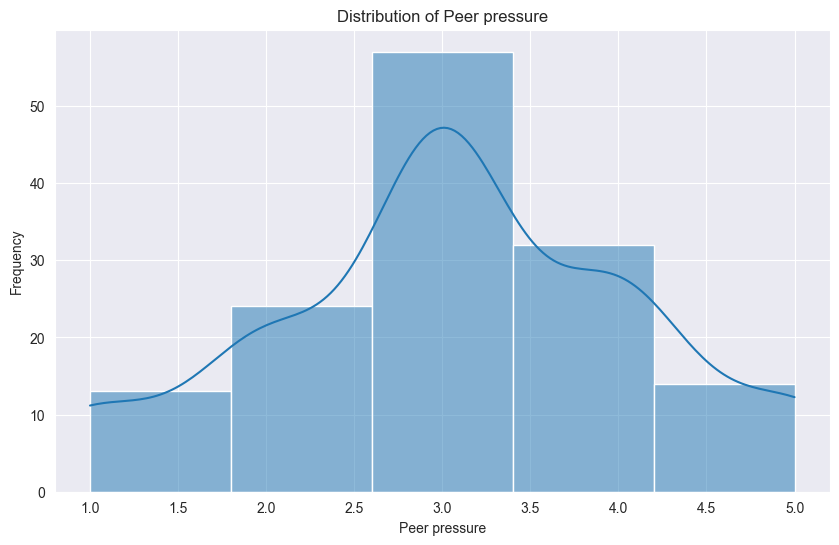

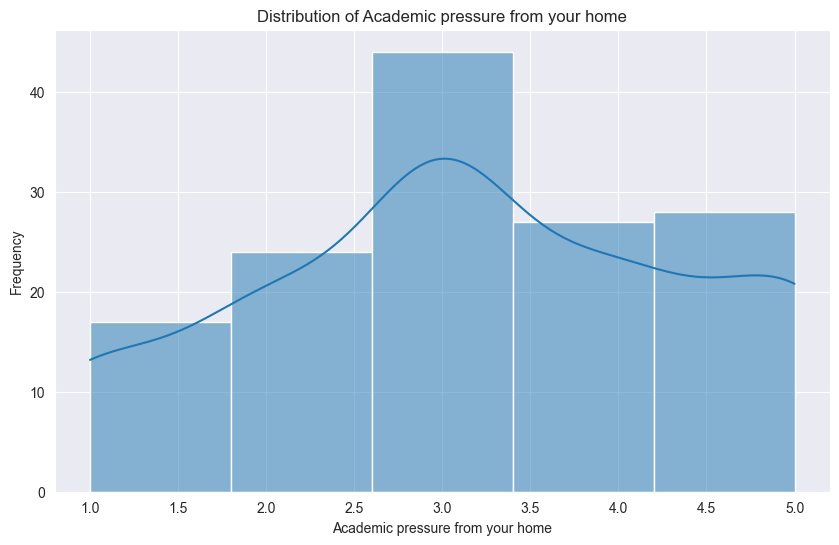

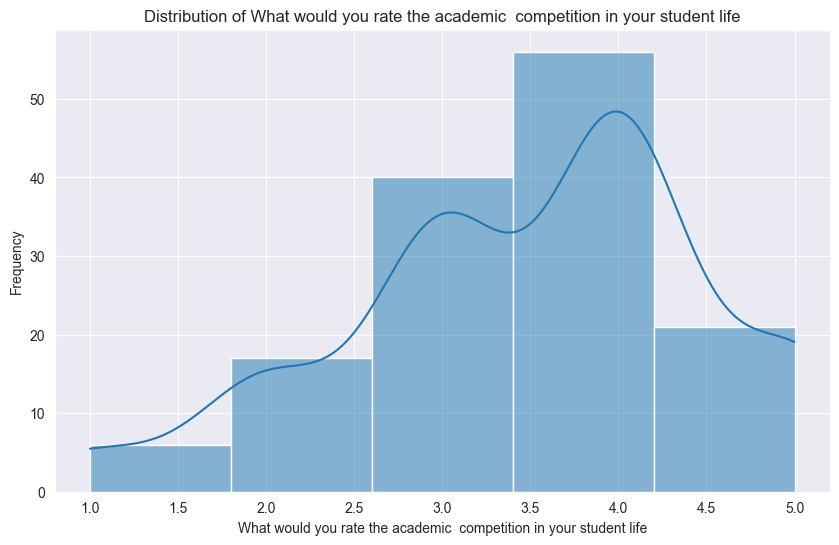

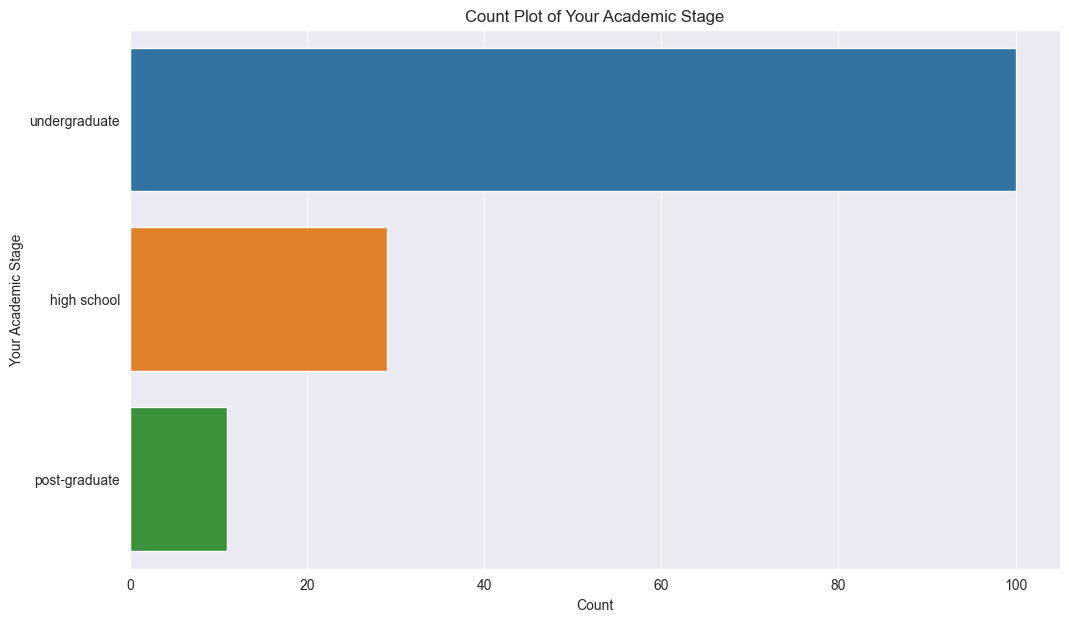

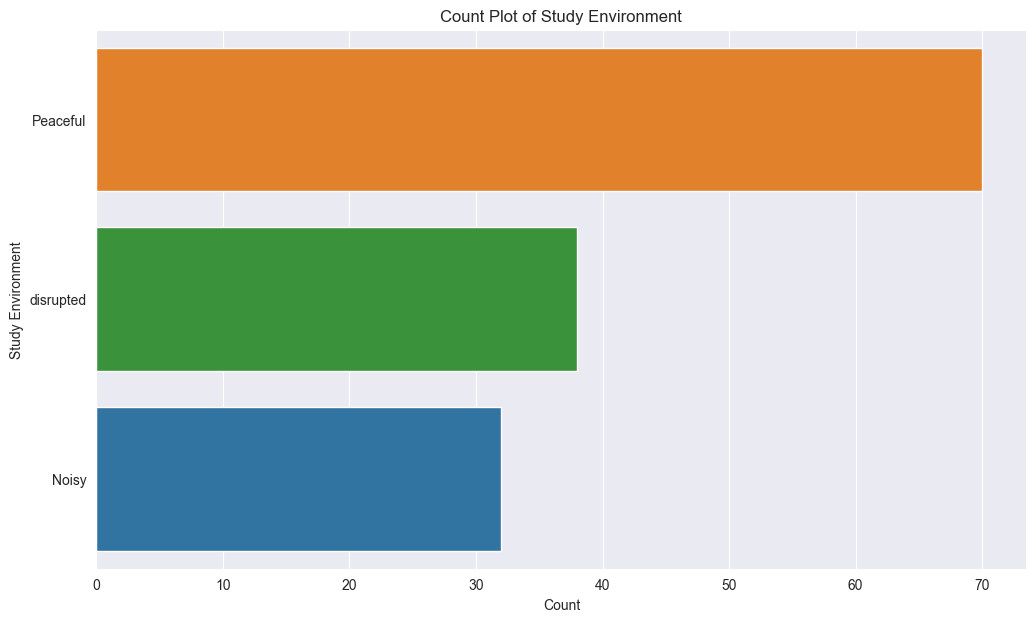

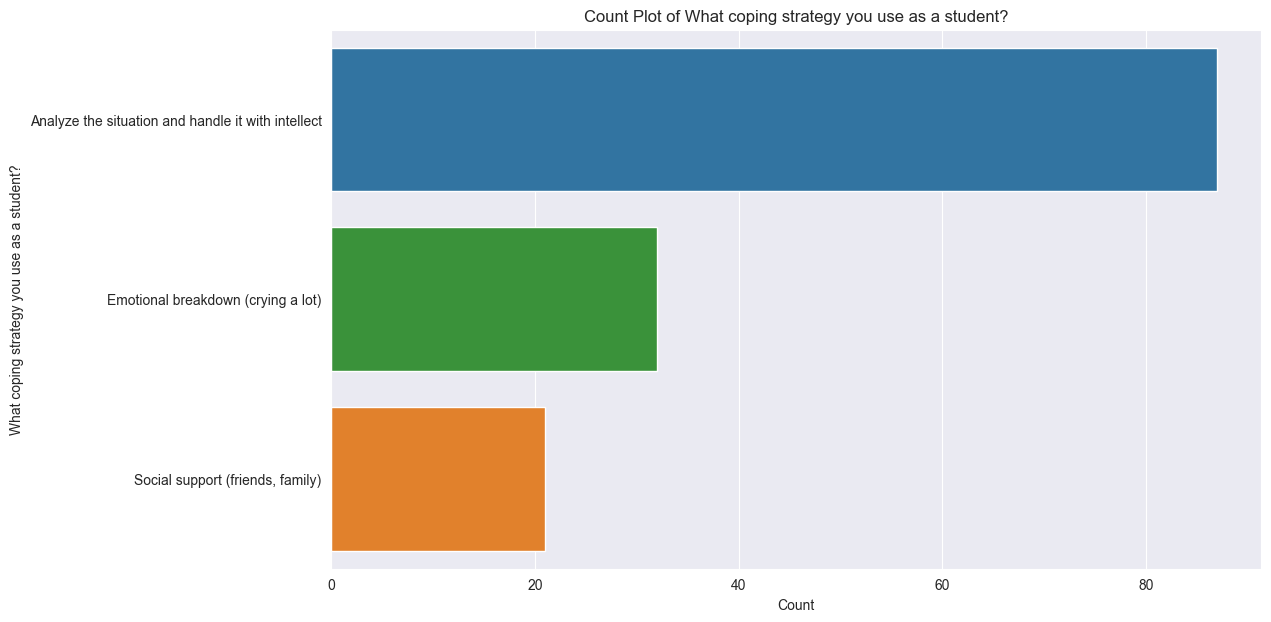

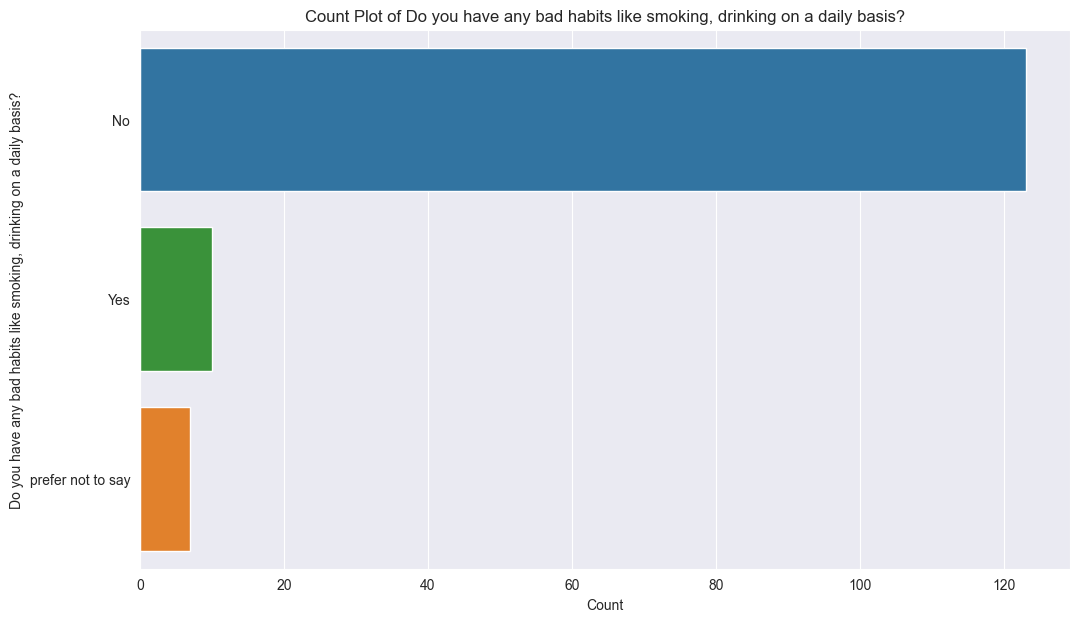

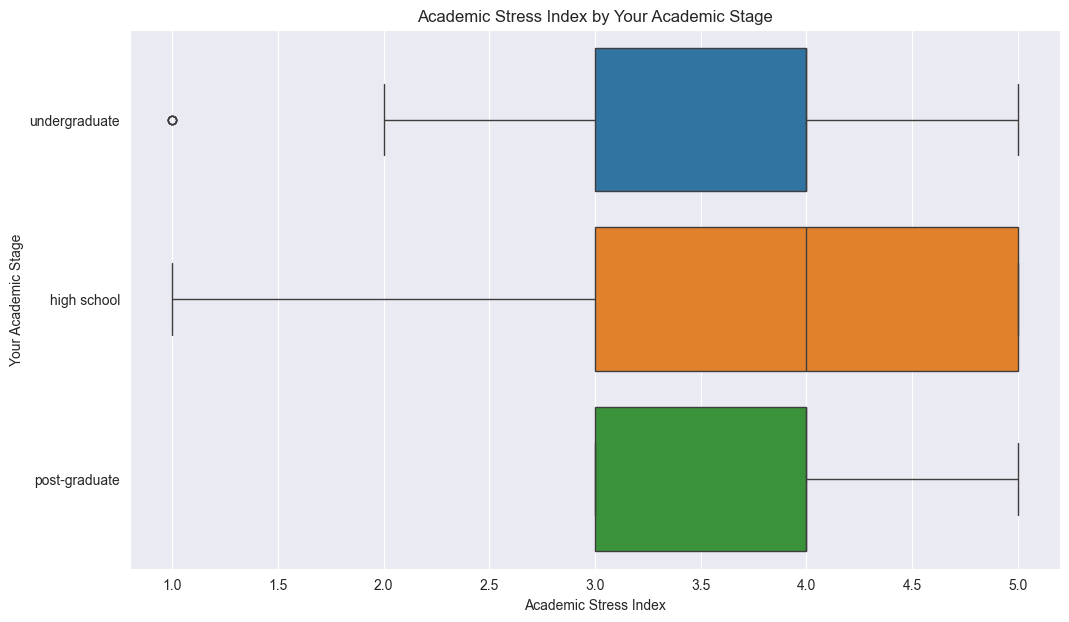

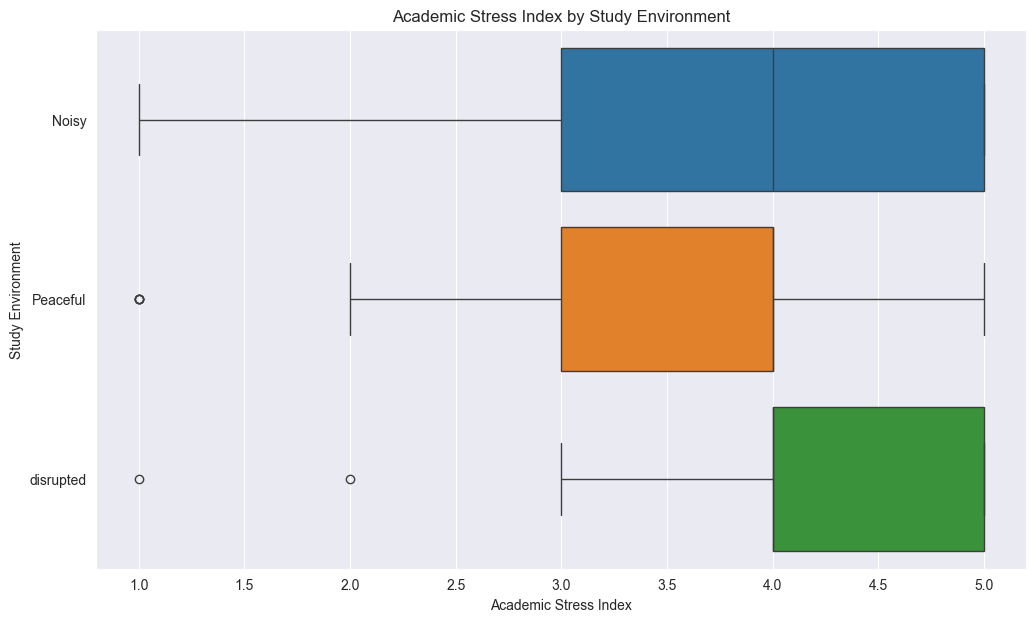

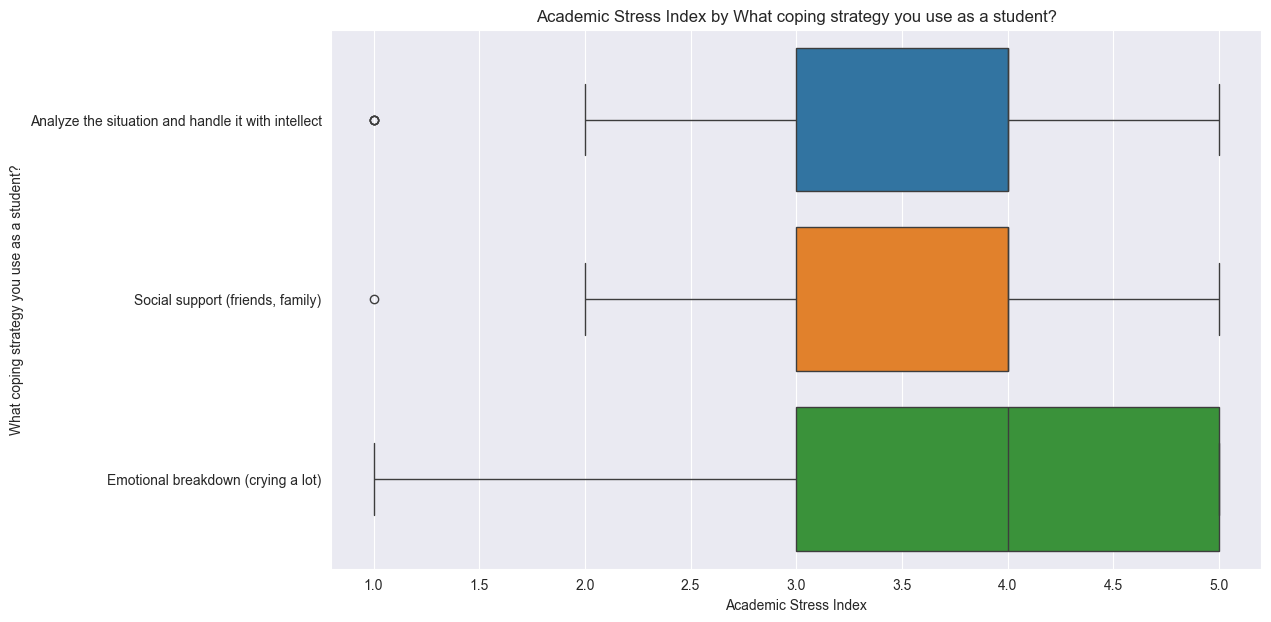

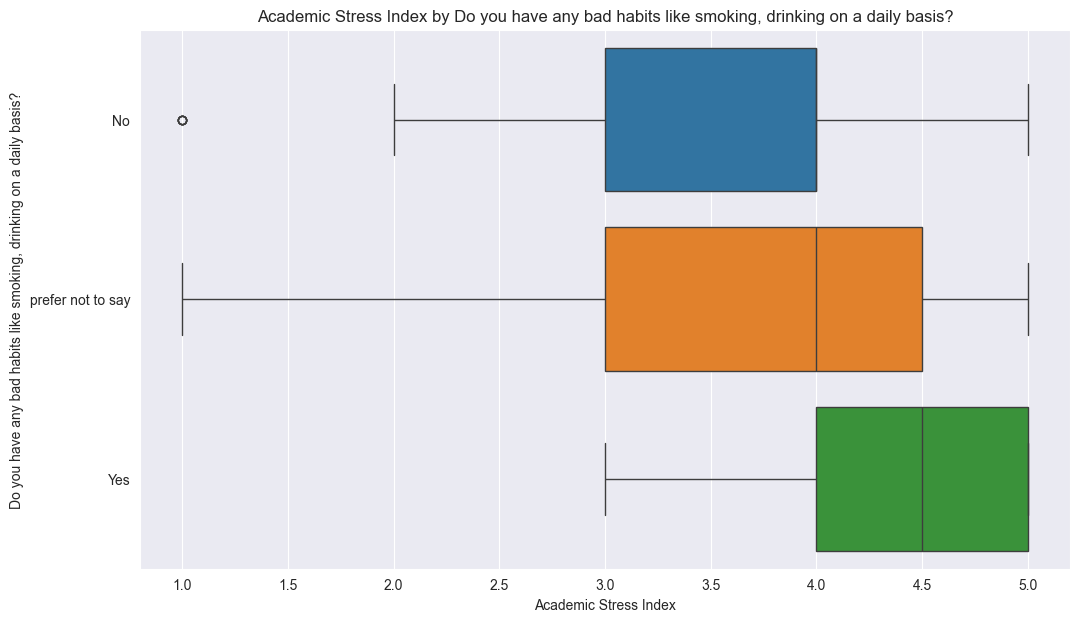

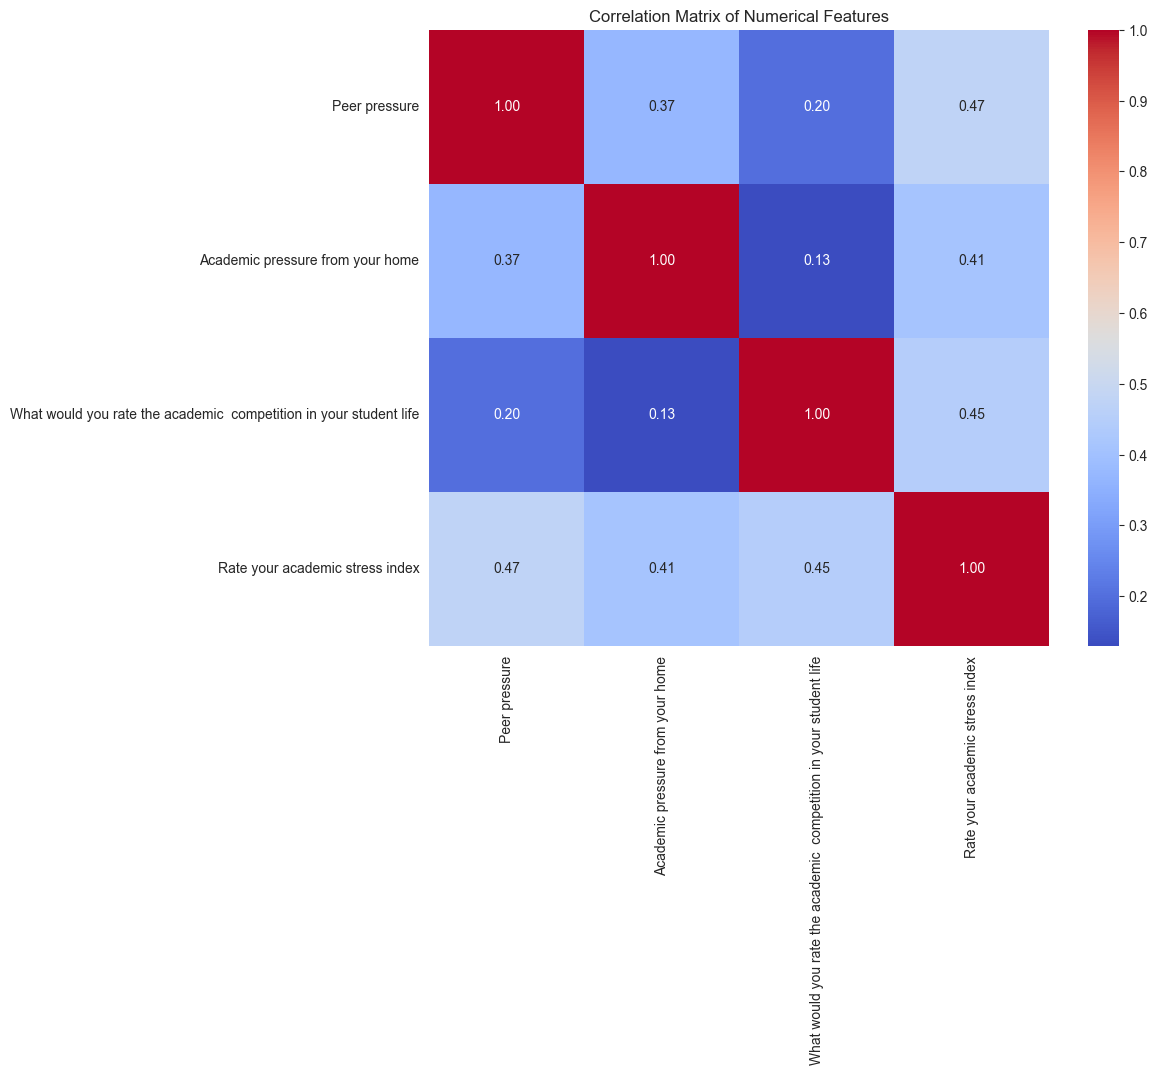

In [10]:
numerical_rating_columns = [
    'Peer pressure',
    'Academic pressure from your home',
    'What would you rate the academic  competition in your student life'
]

for col in numerical_rating_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=5)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

categorical_columns_for_count_plots = [
    'Your Academic Stage',
    'Study Environment',
    'What coping strategy you use as a student?',
    'Do you have any bad habits like smoking, drinking on a daily basis?'
]

for col in categorical_columns_for_count_plots:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, y=col, hue=col, legend=False, order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

# Create box plots for categorical features vs. 'Rate your academic stress index'
categorical_features_for_box_plots = [
    'Your Academic Stage',
    'Study Environment',
    'What coping strategy you use as a student?',
    'Do you have any bad habits like smoking, drinking on a daily basis?'
]

for col in categorical_features_for_box_plots:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data=df, x='Rate your academic stress index', y=col, hue=col, legend=False)
    plt.title(f'Academic Stress Index by {col}')
    plt.xlabel('Academic Stress Index')
    plt.ylabel(col)
    plt.show()

# Compute and visualize the correlation matrix of relevant numerical columns
numerical_correlation_columns = [
    'Peer pressure',
    'Academic pressure from your home',
    'What would you rate the academic  competition in your student life',
    'Rate your academic stress index'
]

plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_correlation_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Model Training and Data Preparation

The next step is to prepare the cleaned and transformed data for machine learning. This involves identifying the features and the target variable (which is 'Rate your academic stress index'). I will use `ColumnTransformer` with `OneHotEncoder` for categorical features and `StandardScaler` for numerical features, and then split the dataset into training and testing sets.

## Data Preparation for Modeling

Prepare the cleaned and transformed data for machine learning. This includes identifying features (X) and the target variable (y), using `ColumnTransformer` with `OneHotEncoder` for categorical features and `StandardScaler` for numerical features, and splitting the dataset into training and testing sets.


As instructed, I will first define the features (X) by dropping the 'Timestamp' and 'Rate your academic stress index' columns, and define the target variable (y) as 'Rate your academic stress index'. Then, I will identify the numerical and categorical features from X. Finally, I will import the necessary `ColumnTransformer`, `OneHotEncoder`, `StandardScaler`, and `train_test_split` modules, create the `ColumnTransformer` for preprocessing, and split the data into training and testing sets.



In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['Timestamp', 'Rate your academic stress index'])
y = df['Rate your academic stress index']

print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

print(f"\nNumerical features: {numerical_features.tolist()}")
print(f"Categorical features: {categorical_features.tolist()}")

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of features (X): (140, 7)
Shape of target (y): (140,)

Numerical features: ['Peer pressure', 'Academic pressure from your home', 'What would you rate the academic  competition in your student life']
Categorical features: ['Your Academic Stage', 'Study Environment', 'What coping strategy you use as a student?', 'Do you have any bad habits like smoking, drinking on a daily basis?']

Shape of X_train: (112, 7)
Shape of X_test: (28, 7)
Shape of y_train: (112,)
Shape of y_test: (28,)


C:\Users\Ricar\AppData\Local\Temp\ipykernel_62348\2658742725.py:14: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_features = X.select_dtypes(include=['object']).columns


## Model Building and Training

Construct a `Pipeline` that integrates the `ColumnTransformer` (for preprocessing) and a suitable regression model (e.g., `LinearRegression`). Train this pipeline on the preprocessed training data to demonstrate an end-to-end machine learning workflow.


As instructed, I will first import the `Pipeline` class from `sklearn.pipeline` and the `LinearRegression` class from `sklearn.linear_model`. Then, I will create a machine learning pipeline that combines the `preprocessor` (which handles scaling and one-hot encoding) with a `LinearRegression` model. Finally, I will fit this `model_pipeline` to the training data (`X_train` and `y_train`) to train the model.



In [12]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Create the pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline to the training data
model_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('regressor', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformer

## Model Evaluation and Prediction

Evaluate the trained model's performance on the test set using relevant regression metrics such as `mean_squared_error` and `r2_score`. This step will demonstrate how the model's predictive capabilities are assessed after the entire data pipeline has been applied.


First, I will use the trained `model_pipeline` to generate predictions on the test set (`X_test`) and store them in `y_pred`.



In [13]:
y_pred = model_pipeline.predict(X_test)

Now that predictions have been generated, I will import the necessary metrics from `sklearn.metrics` to calculate and print the Mean Squared Error (MSE) and R-squared (R2) score. Subsequently, I will create a scatter plot comparing actual vs. predicted values, including a reference line for perfect prediction.



Mean Squared Error (MSE): 0.63
R-squared (R2) Score: 0.34


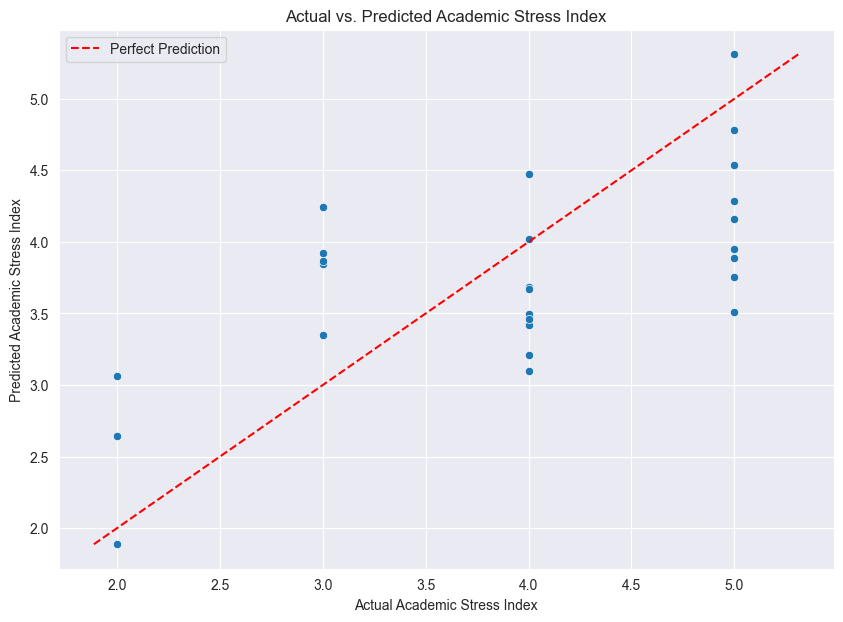


Actual vs. Predicted Values:


,Actual,Predicted
108,4,3.208356
67,4,4.023196
31,4,3.494209
119,5,3.889800
42,5,3.951777


In [14]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2:.2f}")

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred)

# Add title and labels
plt.title('Actual vs. Predicted Academic Stress Index')
plt.xlabel('Actual Academic Stress Index')
plt.ylabel('Predicted Academic Stress Index')

# Add a diagonal line for perfect prediction
# Determine the range for the reference line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

plt.legend()
plt.grid(True)
plt.show()

print('\nActual vs. Predicted Values:')
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(comparison_df.head())

## Make Predictions with New Data

This section allows you to input new student data and get a prediction for their academic stress level using the trained `model_pipeline`.

In [15]:
import pandas as pd

#@title Enter New Student Data
academic_stage = 'undergraduate' #@param ['undergraduate', 'high school', 'post-graduate']
peer_pressure = 2 #@param {type:"slider", min:1, max:5, step:1}
academic_pressure_home = 4 #@param {type:"slider", min:1, max:5, step:1}
study_environment = 'Noisy' #@param ['Noisy', 'Peaceful', 'disrupted']
coping_strategy = 'Social support (friends, family)' #@param ['Analyze the situation and handle it with intellect', 'Social support (friends, family)', 'Emotional breakdown (crying a lot)']
bad_habits = 'No' #@param ['No', 'prefer not to say', 'Yes']
academic_competition = 5 #@param {type:"slider", min:1, max:5, step:1}

# Create a DataFrame from the new data, ensuring column names match the original features used for training
# Note: 'Timestamp' is intentionally omitted as per the updated feature selection.
new_student_input = {
    'Your Academic Stage': [academic_stage],
    'Peer pressure': [peer_pressure],
    'Academic pressure from your home': [academic_pressure_home],
    'Study Environment': [study_environment],
    'What coping strategy you use as a student?': [coping_strategy],
    'Do you have any bad habits like smoking, drinking on a daily basis?': [bad_habits],
    'What would you rate the academic  competition in your student life': [academic_competition]
}

# Create a DataFrame for prediction
new_df_interactive = pd.DataFrame(new_student_input)

print("New Data for Prediction (Interactive Input):")
display(new_df_interactive)

# Make prediction using the trained model pipeline
predicted_stress_index_interactive = model_pipeline.predict(new_df_interactive)

print(f"\nPredicted Academic Stress Index: {predicted_stress_index_interactive[0]:.2f}")

New Data for Prediction (Interactive Input):


,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life
0,undergraduate,2,4,Noisy,"Social support (friends, family)",No,5



Predicted Academic Stress Index: 4.68


## Summary:
Summarize the entire process from EDA and cleaning to model building and evaluation, emphasizing how the pipeline approach from the guide ensures robust data handling and effective model training. Highlight the key insights gained from EDA and the model's performance, discussing its potential for predicting academic stress.

### Data Analysis Key Findings

*   **Data Preparation**:

    The dataset, consisting of 140 entries, was successfully divided into features (X) with 9 columns and a target variable (y) representing 'Rate your academic stress index'.
    Numerical features identified include 'Peer pressure', 'Academic pressure from your home', and 'What would you rate the academic competition in your student life'.
    Categorical features identified include 'Your Academic Stage', 'Study Environment', 'What coping strategy you use as a student?', and 'Do you have any bad habits like smoking, drinking on a daily basis?'.

    A `ColumnTransformer` was set up to apply `StandardScaler` to numerical features and `OneHotEncoder` to categorical features, ensuring proper preprocessing.
    The dataset was split into training (112 samples) and testing (28 samples) sets, maintaining an 80/20 ratio.

*   **Model Building**:

    A machine learning pipeline was constructed, integrating the defined `ColumnTransformer` for preprocessing and a `LinearRegression` model.
    The pipeline was successfully trained on the preprocessed training data.

*   **Model Evaluation**:

    The trained model achieved a Mean Squared Error (MSE) of 0.63 on the test set, indicating the average squared difference between predicted and actual stress index values.
    The R-squared (R2) score was 0.34, suggesting that approximately 34% of the variance in academic stress can be explained by the model using the given features.
    A scatter plot visualizing actual versus predicted academic stress indices confirmed the model's predictive trend, though with noticeable spread around the perfect prediction line.

The pipeline approach effectively integrates data preprocessing and model training, ensuring consistency and reproducibility in the machine learning workflow. The model's current R2 score of 0.34 suggests a moderate ability to predict academic stress, indicating that while it captures some variance, other factors or model complexities might be needed for higher accuracy.

